<a href="https://colab.research.google.com/github/KajalThakur9/fraud-detection/blob/main/denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.3421 - val_loss: 0.2048
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1962 - val_loss: 0.1746
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1714 - val_loss: 0.1609
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1596 - val_loss: 0.1529
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1524 - val_loss: 0.1474
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1475 - val_loss: 0.1440
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1442 - val_loss: 0.1414
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1408 - val_loss: 0.1381
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1377 - val_loss: 0.1356
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1348 - val_loss: 0.1332
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


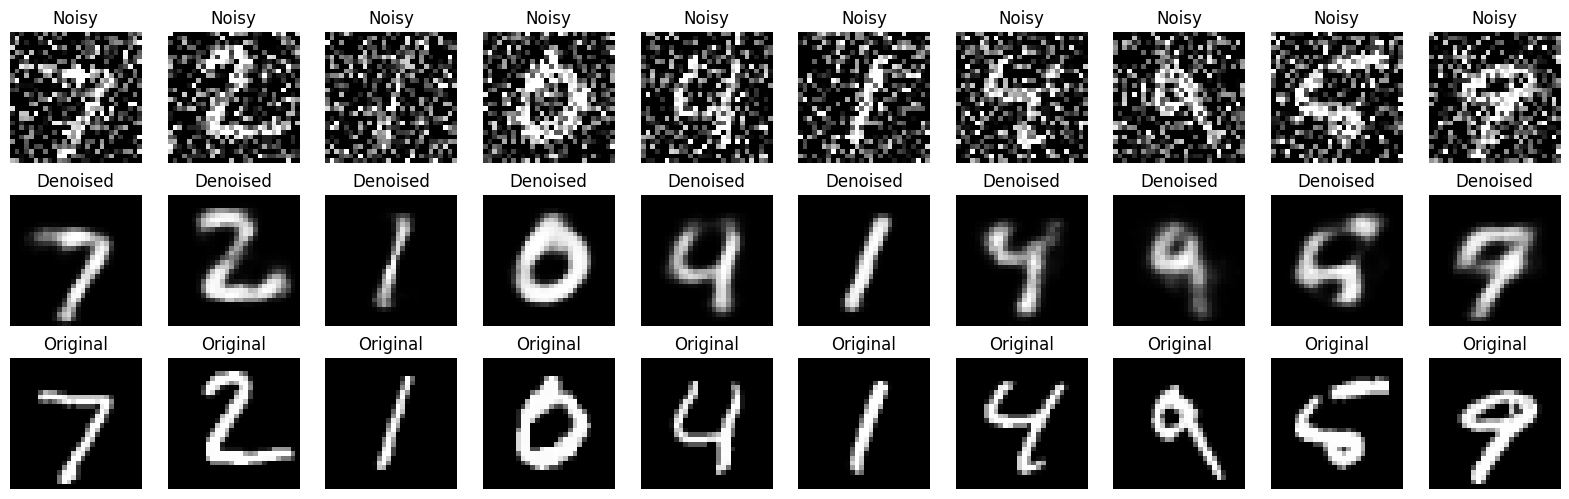

In [7]:
#load datasets

(x_train,_),(x_test,_) = mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
x_train=x_train.reshape((len(x_train),784))
x_test=x_test.reshape((len(x_test),784))

# add noise to images
noise_factor=0.5
x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

# clip values between 0 and 1
x_train_noisy=np.clip(x_train_noisy,0,1)
x_test_noisy=np.clip(x_test_noisy,0,1)

# build autoencoder
input_mig=Input(shape=(784,))
encoded=Dense(128,activation='relu')(input_mig)
decoded=Dense(64,activation='relu')(encoded)
encoded=Dense(32,activation='relu')(decoded) # bottle neck

decoded=Dense(64,activation='relu')(encoded)
decoded=Dense(128,activation='relu')(decoded)
decoded=Dense(784,activation='sigmoid')(decoded)

autoencoder=Model(input_mig,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

# train the auto encoder
autoencoder.fit(x_train_noisy,x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy,x_test))

# predict on noisy test data
decoded_imgs=autoencoder.predict(x_test_noisy)

# show Noisy vs denoised
n=10
plt.figure(figsize=(20,6))
for i in range(n):
    # noisy input
    ax=plt.subplot(3,n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28),cmap='gray')
    plt.title('Noisy')
    plt.axis("off")

    # Denoised output
    ax=plt.subplot(3,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28),cmap='gray')
    plt.title('Denoised')
    plt.axis("off")

    # original
    ax=plt.subplot(3,n,i+1+2*n)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.title('Original')
    plt.axis("off")

plt.show()






